# LAW_DESC Profiling Analysis

This notebook profiles the raw loaded data and identifies which LAW_DESC values capture 80% of records.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

# Set display options
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', None)
sns.set_style('whitegrid')

## Load Data

In [2]:
# Load the data
data_path = Path('../data/processed/rawload/global/data.csv')
df = pd.read_csv(data_path)

print(f"Total records: {len(df):,}")
print(f"Total columns: {len(df.columns)}")
print(f"\nColumn names:")
print(df.columns.tolist())

Total records: 233,410
Total columns: 18

Column names:
['EVNT_KEY', 'OCCUR_DATE', 'TOUR', 'Law Code', 'LAW_DESC', 'LAW_TYPE', 'AGE_GROUP', 'SEX', 'RACE', 'PRECINCT', 'JURISDITION_CODE', 'CITY_NM', 'X_COORD_CD', 'Y_COORD_CD', 'Latitude', 'Longitude', 'Location Point', 'fips']


/var/folders/g1/1dxws3zs1djd1ytsd2h9g9wh0000gn/T/ipykernel_80711/2790323704.py:3: DtypeWarning: Columns (9,10,12,13) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(data_path)


## Basic Data Profile

In [3]:
# Display first few rows
print("First 5 rows:")
df.head()

First 5 rows:


,EVNT_KEY,OCCUR_DATE,TOUR,Law Code,LAW_DESC,LAW_TYPE,AGE_GROUP,SEX,RACE,PRECINCT,JURISDITION_CODE,CITY_NM,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,Location Point,fips
0,262969657,02/03/2023,2300-0659,16-118(6),PUBLIC URINATION,ADMINCODE,25-44,M,BLACK,032,00,MANHATTAN,999433,236538,40.815913,-73.945149,POINT (-73.9451493066481 40.81591307653),3.606102e+10
1,299272654,01/10/2025,2300-0659,16-118(6),PUBLIC URINATION,ADMINCODE,45-64,M,BLACK HISPANIC,052,00,BRONX,1010675,253887,40.863507,-73.904465,POINT (-73.904465 40.863507),3.600503e+10
2,267154704,04/22/2023,1500-2259,16-118(6),PUBLIC URINATION,ADMINCODE,45-64,M,WHITE HISPANIC,025,00,MANHATTAN,1001797,232215,40.804037,-73.936617,POINT (-73.936617 40.804037),3.606102e+10
3,273161847,08/20/2023,2300-0659,16-118(1)(b),SPITTING,ADMINCODE,18-24,M,WHITE,006,00,MANHATTAN,984015,205081,40.729578,-74.000844,POINT (-74.000844 40.729578),3.606101e+10
4,262784412,01/31/2023,1500-2259,20-453,UNLICENSED GENERAL VENDOR,ADMINCODE,25-44,M,BLACK,108,00,QUEENS,1006135,210137,40.743428,-73.921019,POINT (-73.921019 40.743428),3.608102e+10


In [4]:
# Data types and missing values
print("Data Info:")
df.info()

Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233410 entries, 0 to 233409
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   EVNT_KEY          233410 non-null  int64  
 1   OCCUR_DATE        233410 non-null  object 
 2   TOUR              233410 non-null  object 
 3   Law Code          233410 non-null  object 
 4   LAW_DESC          233410 non-null  object 
 5   LAW_TYPE          233410 non-null  object 
 6   AGE_GROUP         233410 non-null  object 
 7   SEX               233410 non-null  object 
 8   RACE              233410 non-null  object 
 9   PRECINCT          233410 non-null  object 
 10  JURISDITION_CODE  233410 non-null  object 
 11  CITY_NM           233410 non-null  object 
 12  X_COORD_CD        233410 non-null  object 
 13  Y_COORD_CD        233410 non-null  object 
 14  Latitude          233408 non-null  float64
 15  Longitude         233408 non-null  float64
 16  Location 

In [5]:
# Missing value summary
missing = df.isnull().sum()
missing_pct = (missing / len(df) * 100).round(2)
missing_summary = pd.DataFrame({
    'Missing Count': missing,
    'Missing %': missing_pct
})
missing_summary = missing_summary[missing_summary['Missing Count'] > 0].sort_values('Missing Count', ascending=False)
print("\nMissing Values:")
missing_summary


Missing Values:


,Missing Count,Missing %
fips,31668,13.57
Latitude,2,0.00
Longitude,2,0.00
Location Point,2,0.00


## LAW_DESC Analysis

In [6]:
# Count unique LAW_DESC values
unique_law_desc = df['LAW_DESC'].nunique()
print(f"Number of unique LAW_DESC values: {unique_law_desc}")
print(f"\nLAW_DESC value counts:")

# Get value counts with Law Code
law_desc_counts = df.groupby(['LAW_DESC', 'Law Code']).size().reset_index(name='count')

# Sort by count descending
law_desc_counts = law_desc_counts.sort_values('count', ascending=False).reset_index(drop=True)

# Calculate percentages and cumulative percentages
law_desc_counts['percentage'] = (law_desc_counts['count'] / len(df) * 100).round(2)
law_desc_counts['cumulative_percentage'] = law_desc_counts['percentage'].cumsum().round(2)

# Reorder columns for better readability
law_desc_counts = law_desc_counts[['Law Code', 'LAW_DESC', 'count', 'percentage', 'cumulative_percentage']]

law_desc_counts.head(20)

Number of unique LAW_DESC values: 372

LAW_DESC value counts:


,Law Code,LAW_DESC,count,percentage,cumulative_percentage
0,10-125,UNLAWFUL CONSUMPTION/POSSESSION OF ALCOHOLIC B...,132128,56.61,56.61
1,16-118(6),PUBLIC URINATION,21107,9.04,65.65
2,19-176(b),UNLAWFUL BICYCLE RIDING ON SIDEWALK,9704,4.16,69.81
3,19-190(B),"RIGHT OF WAY - FAILURE TO YIELD, PHYSICAL INJURY",6438,2.76,72.57
4,20-453,UNLICENSED GENERAL VENDOR,6061,2.60,75.17
5,17-503(D)(3),SMOKING IN PARK OR ON OTHER PROPERTY UNDER JUR...,6019,2.58,77.75
6,19-176.2(B),OPERATION OF MOTORIZED SCOOTER WITHIN THE CITY...,5255,2.25,80.00
7,17-315(E),"VEND IN BUS STOP, NEXT TO HOSPITAL/10 FT OF DR...",4757,2.04,82.04
8,1-03(A)(3),UNAUTHORIZED PRESENCE IN PARK WHEN CLOSED TO P...,3254,1.39,83.43
9,19-136(b),VEHICLE(S) ON SIDEWALK,2994,1.28,84.71


## 80/20 Analysis (Pareto)

Identify which LAW_DESC values capture 80% of all records.

In [7]:
# Find LAW_DESC values that capture 80% of records
threshold = 80.0
top_law_desc = law_desc_counts[law_desc_counts['cumulative_percentage'] <= threshold]

# Include the first one that crosses the threshold
if len(top_law_desc) < len(law_desc_counts):
    next_idx = len(top_law_desc)
    top_law_desc = law_desc_counts.iloc[:next_idx + 1]

print(f"\n{'='*80}")
print(f"LAW_DESC values that capture {threshold}% of records:")
print(f"{'='*80}\n")
print(f"Number of LAW_DESC values: {len(top_law_desc)} out of {unique_law_desc}")
print(f"Percentage of total LAW_DESC categories: {len(top_law_desc) / unique_law_desc * 100:.1f}%")
print(f"Total records covered: {top_law_desc['count'].sum():,} out of {len(df):,}")
print(f"Cumulative percentage: {top_law_desc['cumulative_percentage'].iloc[-1]:.2f}%")
print(f"\n{'-'*80}\n")

top_law_desc


LAW_DESC values that capture 80.0% of records:

Number of LAW_DESC values: 8 out of 372
Percentage of total LAW_DESC categories: 2.2%
Total records covered: 191,469 out of 233,410
Cumulative percentage: 82.04%

--------------------------------------------------------------------------------



,Law Code,LAW_DESC,count,percentage,cumulative_percentage
0,10-125,UNLAWFUL CONSUMPTION/POSSESSION OF ALCOHOLIC B...,132128,56.61,56.61
1,16-118(6),PUBLIC URINATION,21107,9.04,65.65
2,19-176(b),UNLAWFUL BICYCLE RIDING ON SIDEWALK,9704,4.16,69.81
3,19-190(B),"RIGHT OF WAY - FAILURE TO YIELD, PHYSICAL INJURY",6438,2.76,72.57
4,20-453,UNLICENSED GENERAL VENDOR,6061,2.60,75.17
5,17-503(D)(3),SMOKING IN PARK OR ON OTHER PROPERTY UNDER JUR...,6019,2.58,77.75
6,19-176.2(B),OPERATION OF MOTORIZED SCOOTER WITHIN THE CITY...,5255,2.25,80.00
7,17-315(E),"VEND IN BUS STOP, NEXT TO HOSPITAL/10 FT OF DR...",4757,2.04,82.04


## Visualizations

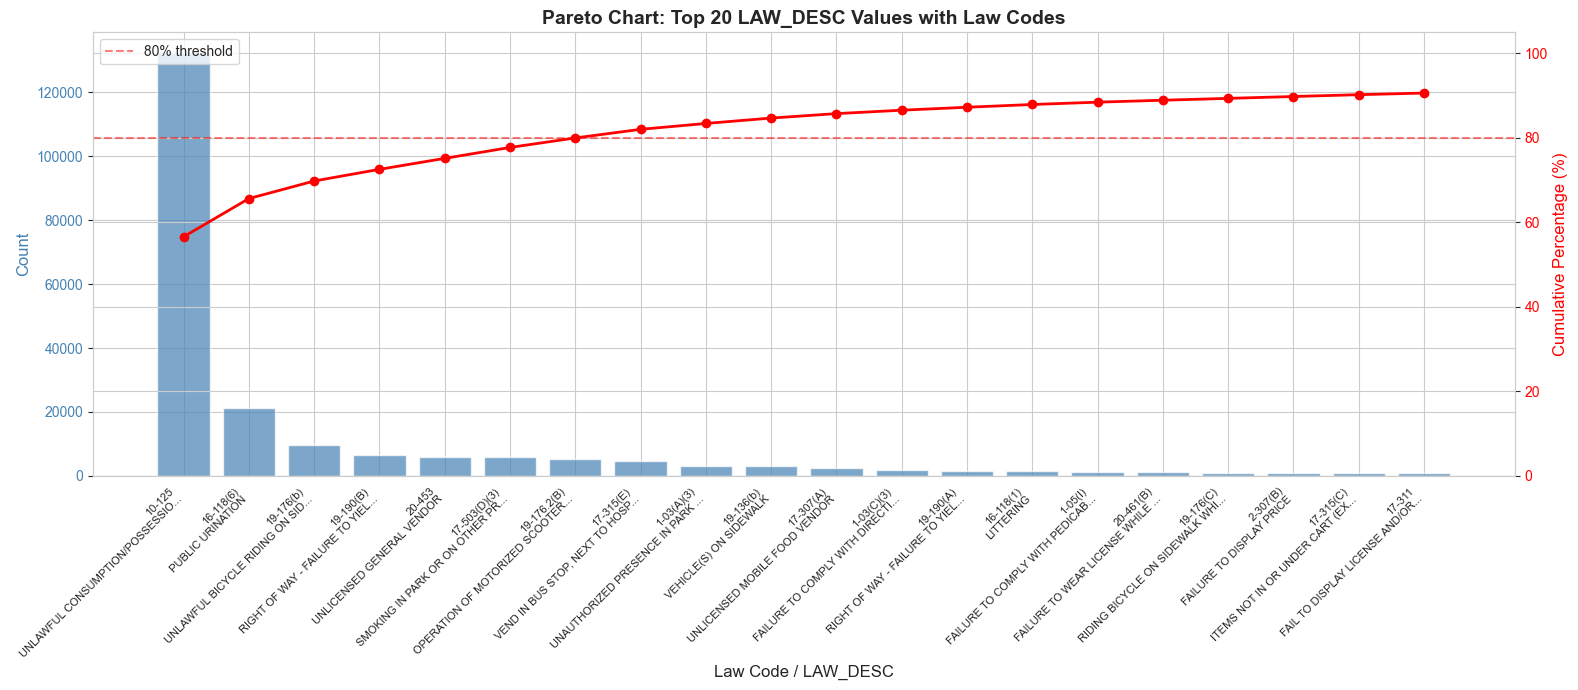

In [8]:
# Pareto chart
fig, ax1 = plt.subplots(figsize=(16, 7))

# Plot top 20 for readability
plot_data = law_desc_counts.head(20)

# Create combined labels with Law Code
plot_labels = [f"{row['Law Code']}\n{row['LAW_DESC'][:30]}..." if len(row['LAW_DESC']) > 30 
               else f"{row['Law Code']}\n{row['LAW_DESC']}" 
               for _, row in plot_data.iterrows()]

# Bar chart for counts
ax1.bar(range(len(plot_data)), plot_data['count'], color='steelblue', alpha=0.7)
ax1.set_xlabel('Law Code / LAW_DESC', fontsize=12)
ax1.set_ylabel('Count', fontsize=12, color='steelblue')
ax1.tick_params(axis='y', labelcolor='steelblue')
ax1.set_xticks(range(len(plot_data)))
ax1.set_xticklabels(plot_labels, rotation=45, ha='right', fontsize=8)

# Line chart for cumulative percentage
ax2 = ax1.twinx()
ax2.plot(range(len(plot_data)), plot_data['cumulative_percentage'], color='red', marker='o', linewidth=2)
ax2.axhline(y=80, color='red', linestyle='--', alpha=0.5, label='80% threshold')
ax2.set_ylabel('Cumulative Percentage (%)', fontsize=12, color='red')
ax2.tick_params(axis='y', labelcolor='red')
ax2.set_ylim(0, 105)
ax2.legend(loc='upper left')

plt.title('Pareto Chart: Top 20 LAW_DESC Values with Law Codes', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

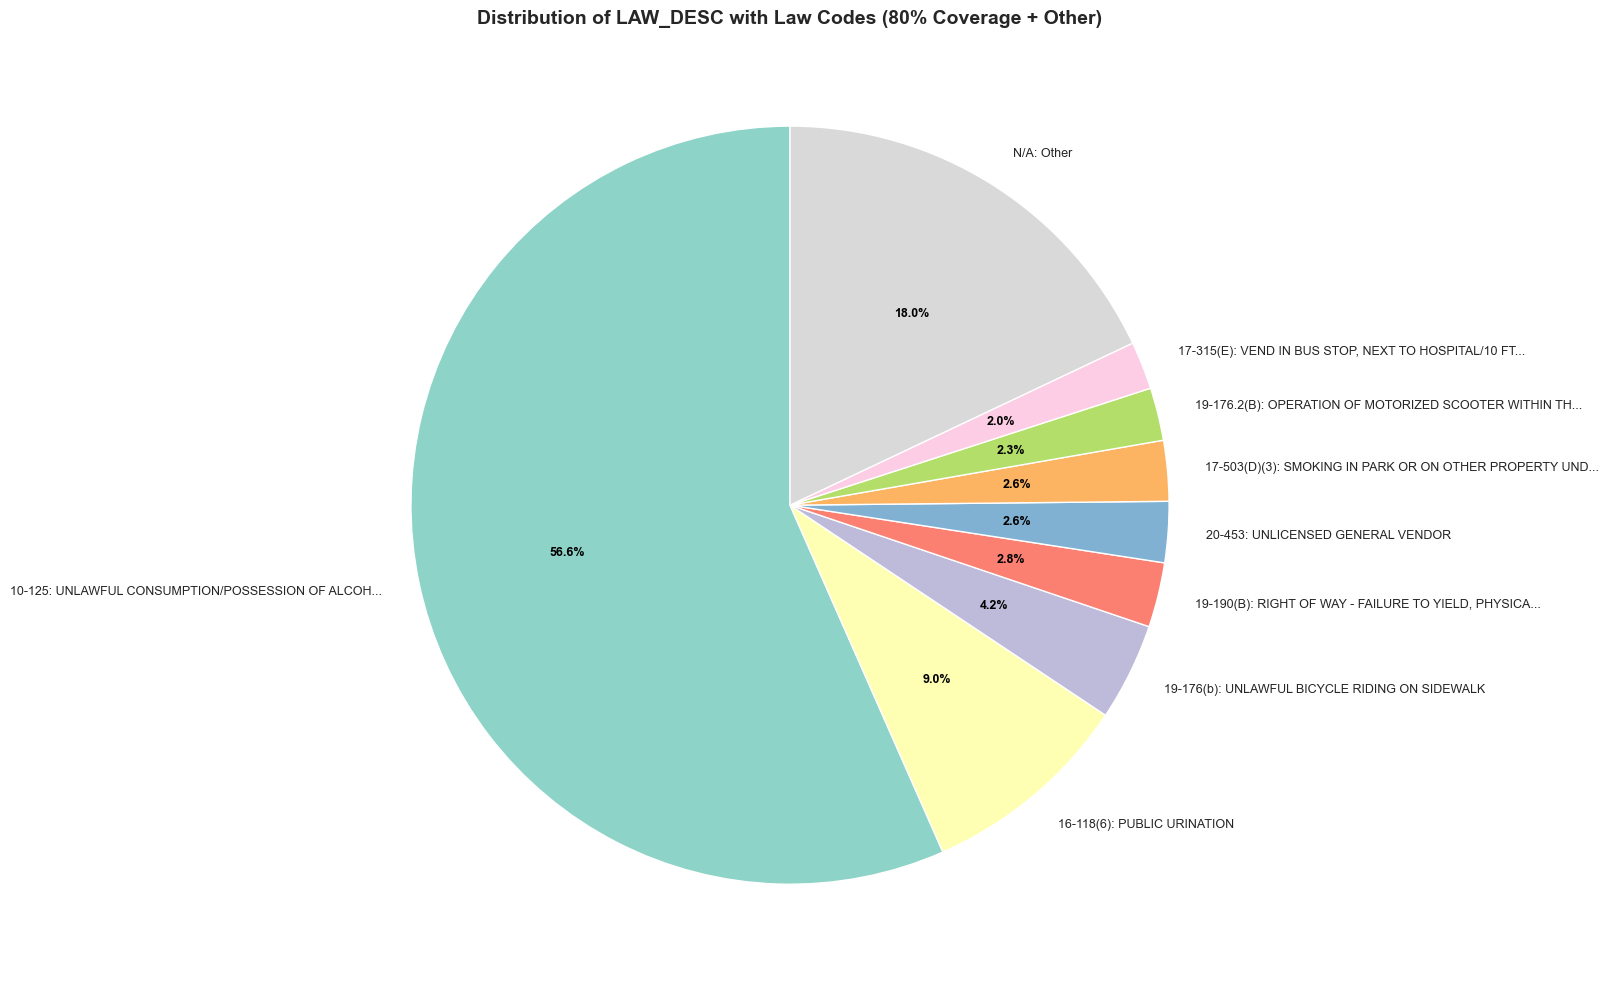

In [9]:
# Pie chart for top LAW_DESC that capture 80%
fig, ax = plt.subplots(figsize=(14, 10))

# Prepare data for pie chart
pie_data = top_law_desc.copy()
other_count = len(df) - pie_data['count'].sum()

if other_count > 0:
    other_row = pd.DataFrame([{
        'Law Code': 'N/A',
        'LAW_DESC': 'Other',
        'count': other_count,
        'percentage': (other_count / len(df) * 100)
    }])
    pie_data = pd.concat([pie_data, other_row], ignore_index=True)

# Create labels with Law Code
pie_labels = [f"{row['Law Code']}: {row['LAW_DESC'][:40]}..." if len(row['LAW_DESC']) > 40 
              else f"{row['Law Code']}: {row['LAW_DESC']}" 
              for _, row in pie_data.iterrows()]

colors = plt.cm.Set3(range(len(pie_data)))
wedges, texts, autotexts = ax.pie(
    pie_data['count'],
    labels=pie_labels,
    autopct='%1.1f%%',
    colors=colors,
    startangle=90
)

# Make percentage text more readable
for autotext in autotexts:
    autotext.set_color('black')
    autotext.set_fontsize(9)
    autotext.set_weight('bold')

# Adjust label size
for text in texts:
    text.set_fontsize(9)

plt.title('Distribution of LAW_DESC with Law Codes (80% Coverage + Other)', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

## Summary Statistics

In [10]:
# Summary statistics
print("\n" + "="*80)
print("SUMMARY STATISTICS")
print("="*80)
print(f"\nTotal Records: {len(df):,}")
print(f"Unique LAW_DESC values: {unique_law_desc}")
print(f"\nTop LAW_DESC value:")
print(f"  - Law Code: {law_desc_counts.iloc[0]['Law Code']}")
print(f"  - Description: {law_desc_counts.iloc[0]['LAW_DESC']}")
print(f"  - Count: {law_desc_counts.iloc[0]['count']:,}")
print(f"  - Percentage: {law_desc_counts.iloc[0]['percentage']:.2f}%")
print(f"\n80% coverage achieved with: {len(top_law_desc)} LAW_DESC values")
print(f"This represents: {len(top_law_desc) / unique_law_desc * 100:.1f}% of all unique LAW_DESC values")
print("="*80)


SUMMARY STATISTICS

Total Records: 233,410
Unique LAW_DESC values: 372

Top LAW_DESC value:
  - Law Code: 10-125
  - Description: UNLAWFUL CONSUMPTION/POSSESSION OF ALCOHOLIC BEVERAGES
  - Count: 132,128
  - Percentage: 56.61%

80% coverage achieved with: 8 LAW_DESC values
This represents: 2.2% of all unique LAW_DESC values


## Export Top LAW_DESC to CSV

In [11]:
# Export the top LAW_DESC that capture 80% to CSV
output_path = Path('../output/top_law_desc_80pct.csv')
output_path.parent.mkdir(parents=True, exist_ok=True)
top_law_desc.to_csv(output_path, index=False)
print(f"\nTop LAW_DESC values exported to: {output_path}")


Top LAW_DESC values exported to: ../output/top_law_desc_80pct.csv
